In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('SalesAnalysis.csv')
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


## Cleaning Data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


there are 544 null values, we can drop them , this will not cause any effect in data

In [4]:
data = data.dropna()
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [5]:
data = data.drop_duplicates()
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [6]:
data['Quantity Ordered'].unique()


array(['2', '1', '3', '5', 'Quantity Ordered', '4', '7', '6', '8', '9'],
      dtype=object)

In [7]:
list(data)

['Order ID',
 'Product',
 'Quantity Ordered',
 'Price Each',
 'Order Date',
 'Purchase Address']

In [8]:
data[(data['Quantity Ordered']=='Quantity Ordered')|(data['Order ID']=='Order ID')|(data['Price Each']=='Price Each')]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [9]:
data.drop(data[(data['Quantity Ordered']=='Quantity Ordered')|(data['Order ID']=='Order ID')|(data['Price Each']=='Price Each')].index,inplace = True)

C:\Users\Parn\AppData\Local\Temp\ipykernel_8980\880202453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[(data['Quantity Ordered']=='Quantity Ordered')|(data['Order ID']=='Order ID')|(data['Price Each']=='Price Each')].index,inplace = True)


## Convert the text based categorical columns to numeric columns

In [10]:
data['Order ID'] = pd.to_numeric(data['Order ID'])
data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'])
data['Price Each'] = pd.to_numeric(data['Price Each'])

C:\Users\Parn\AppData\Local\Temp\ipykernel_8980\2290589467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Order ID'] = pd.to_numeric(data['Order ID'])
C:\Users\Parn\AppData\Local\Temp\ipykernel_8980\2290589467.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'])
C:\Users\Parn\AppData\Local\Temp\ipykernel_8980\2290589467.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

## Convert the Order Date column into Day, Month, Year and Time columns separately


In [11]:
data2 = data
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185686 non-null  int64  
 1   Product           185686 non-null  object 
 2   Quantity Ordered  185686 non-null  int64  
 3   Price Each        185686 non-null  float64
 4   Order Date        185686 non-null  object 
 5   Purchase Address  185686 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 9.9+ MB


In [12]:
data3 = data2['Order Date'].str.split(' ',expand = True)
data4 = data3[0].str.split('/',expand = True)
data3 = data3.drop(columns = 0)
TimeData =  pd.concat([data3, data4],ignore_index=True, axis=1)
TimeData.rename(columns={0:'Time',1:'Date', 2:'Month',3:'Year'}, inplace = True)
TimeData
data2 = data
data2 = pd.concat([data,TimeData],axis = 1)
# data.drop(columns = 'Order Date', inplace =True)
data2

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Time,Date,Month,Year
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",08:46,04,19,19
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",22:30,04,07,19
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",14:38,04,12,19
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",14:38,04,12,19
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",09:27,04,30,19
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",20:56,09,17,19
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",16:00,09,01,19
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",07:39,09,23,19
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",17:30,09,19,19


## Convert the Order Date column into Day, Month, Year and Time columns separately (Method 2)

In [13]:
data['Order Date'] = pd.to_datetime(data['Order Date'],format = '%m/%d/%y %H:%M')
data['Year'] = data['Order Date'].dt.year
data['Month'] = data['Order Date'].dt.month
data['Date'] = data['Order Date'].dt.day
data['Time'] = data['Order Date'].dt.time
data

C:\Users\Parn\AppData\Local\Temp\ipykernel_8980\1750334547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Order Date'] = pd.to_datetime(data['Order Date'],format = '%m/%d/%y %H:%M')
C:\Users\Parn\AppData\Local\Temp\ipykernel_8980\1750334547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data['Order Date'].dt.year
C:\Users\Parn\AppData\Local\Temp\ipykernel_8980\1750334547.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Date,Time
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,19,08:46:00
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,7,22:30:00
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14:38:00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14:38:00
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,30,09:27:00
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",2019,9,17,20:56:00
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",2019,9,1,16:00:00
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",2019,9,23,07:39:00
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",2019,9,19,17:30:00


## Create a new column and store the Price data as rounded off in integer format

In [14]:
data['Price'] = data['Price Each'].apply(lambda x: round(x))

C:\Users\Parn\AppData\Local\Temp\ipykernel_8980\930605958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price'] = data['Price Each'].apply(lambda x: round(x))


In [15]:
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Date,Time,Price
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,19,08:46:00,12
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,7,22:30:00,100
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14:38:00,600
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14:38:00,12
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,30,09:27:00,12
...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",2019,9,17,20:56:00,3
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",2019,9,1,16:00:00,700
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",2019,9,23,07:39:00,700
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",2019,9,19,17:30:00,380


## Create a new column and store the PIN Codes from the Address column

In [16]:
data['Pin Code'] = data['Purchase Address'].apply(lambda a: a.split(' ')[-1])

C:\Users\Parn\AppData\Local\Temp\ipykernel_8980\2194623024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Pin Code'] = data['Purchase Address'].apply(lambda a: a.split(' ')[-1])


In [17]:
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Date,Time,Price,Pin Code
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,19,08:46:00,12,75001
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,7,22:30:00,100,02215
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14:38:00,600,90001
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14:38:00,12,90001
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,30,09:27:00,12,90001
...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",2019,9,17,20:56:00,3,90001
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",2019,9,1,16:00:00,700,94016
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",2019,9,23,07:39:00,700,94016
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",2019,9,19,17:30:00,380,94016


## Is there any pattern in the Order ID? If yes, find it

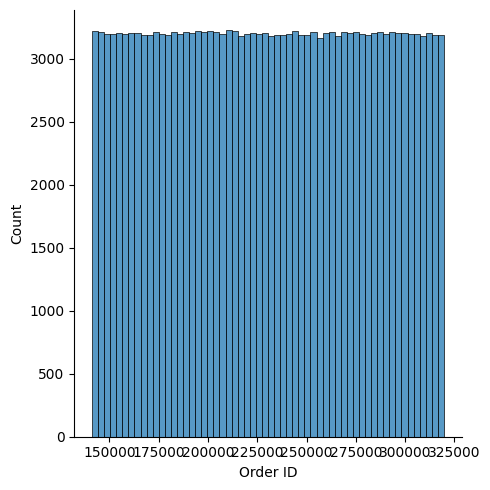

In [18]:
# sns.distplot(x = 'Order ID', data = data)
sns.displot(x = 'Order ID', data = data)
# no patterns in Order ID 

## . Create a new column named City and store the city names from the Address column

In [19]:
data['City'] = data['Purchase Address'].apply(lambda a: a.split(',')[1])
data

C:\Users\Parn\AppData\Local\Temp\ipykernel_8980\1690075927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['City'] = data['Purchase Address'].apply(lambda a: a.split(',')[1])


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Date,Time,Price,Pin Code,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,19,08:46:00,12,75001,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,7,22:30:00,100,02215,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14:38:00,600,90001,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14:38:00,12,90001,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,30,09:27:00,12,90001,Los Angeles
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",2019,9,17,20:56:00,3,90001,Los Angeles
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",2019,9,1,16:00:00,700,94016,San Francisco
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",2019,9,23,07:39:00,700,94016,San Francisco
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",2019,9,19,17:30:00,380,94016,San Francisco


## Group Product column into different categories such as Phones, Accessories, etc  according to the data available.

In [20]:
data['Product'].unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

In [21]:
# groups
a = 'Cable'
b = 'Batteries'
c = 'Headphones'
d = 'Phone'
e = 'TV'
f = 'Monitor'
g = 'Laptop'
h = 'Dryer'
i = 'Washing Machine'
categories = [a,b,c,d,e,f,g,h,i]
def Condition(x):
    if(a in x):
        return 'Cable'
    elif(b in x):
        return 'Batteries'
    elif(c in x):
        return 'Headphones'
    elif(d in x):
        return 'Phone'
    elif(e in x):
        return 'TV'
    elif(g in x):
        return 'Laptop'
    elif(h in x):
        return 'Dryer'
    elif(f in x):
        return 'Monitor'
    elif(i in x):
        return 'Washing Machine'
    else:
        return 'unknown'
    
    
data['Categories'] = data['Product'].apply(Condition)


C:\Users\Parn\AppData\Local\Temp\ipykernel_8980\72513338.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Categories'] = data['Product'].apply(Condition)


In [22]:
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Date,Time,Price,Pin Code,City,Categories
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,19,08:46:00,12,75001,Dallas,Cable
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,7,22:30:00,100,02215,Boston,Headphones
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14:38:00,600,90001,Los Angeles,Phone
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14:38:00,12,90001,Los Angeles,Headphones
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,30,09:27:00,12,90001,Los Angeles,Headphones
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",2019,9,17,20:56:00,3,90001,Los Angeles,Batteries
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",2019,9,1,16:00:00,700,94016,San Francisco,Phone
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",2019,9,23,07:39:00,700,94016,San Francisco,Phone
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",2019,9,19,17:30:00,380,94016,San Francisco,Monitor


## Create 12 separate date ordered dataframes for every month.

In [23]:
data2 = data
month_db = {}
months = [1,2,3,4,5,6,7,8,9,10,11,12]
for i in range(1 , 13):
    monthdata = data2[data2['Month']==i].copy()
    month_db[i] = monthdata

jan_db = month_db[1]
feb_db = month_db[2]
march_db = month_db[3]
april_db = month_db[4]
may_db = month_db[5]
june_db = month_db[6]
july_db = month_db[7]
aug_db = month_db[8]
sept_db = month_db[9]
oct_db = month_db[10]
nov_db = month_db[11]
dec_db = month_db[12]


In [24]:
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Date,Time,Price,Pin Code,City,Categories
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,19,08:46:00,12,75001,Dallas,Cable
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,7,22:30:00,100,02215,Boston,Headphones
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14:38:00,600,90001,Los Angeles,Phone
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14:38:00,12,90001,Los Angeles,Headphones
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,30,09:27:00,12,90001,Los Angeles,Headphones
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",2019,9,17,20:56:00,3,90001,Los Angeles,Batteries
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",2019,9,1,16:00:00,700,94016,San Francisco,Phone
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",2019,9,23,07:39:00,700,94016,San Francisco,Phone
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",2019,9,19,17:30:00,380,94016,San Francisco,Monitor


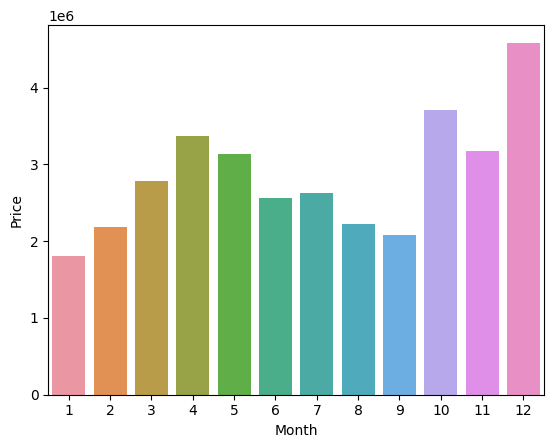

In [25]:
month_grp = data.groupby('Month')['Price'].sum()
g = sns.barplot(x = 'Month' ,y = 'Price', data =data.groupby('Month')['Price'].sum().reset_index())
                
# data.groupby('Month')['Price'].sum().reset_index()
# g.set(ylim = (0.00000,5000000))
# g.bar_label(g.containers[0])

Conclusion: Highest sales were on december 

<AxesSubplot: xlabel='Quantity Ordered', ylabel='City'>

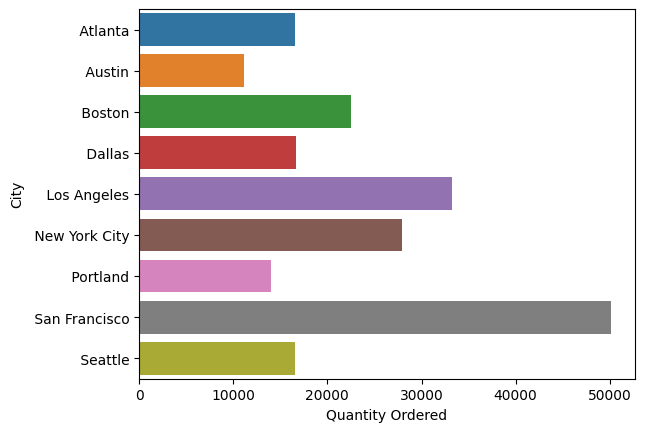

In [26]:
f = data.groupby('City').sum(numeric_only = True).reset_index()
sns.barplot(x = 'Quantity Ordered', y = 'City', data = f)

san fransisco sold the most products

In [27]:
data['hour'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.hour

C:\Users\Parn\AppData\Local\Temp\ipykernel_8980\3314451638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['hour'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.hour


In [28]:
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Date,Time,Price,Pin Code,City,Categories,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,19,08:46:00,12,75001,Dallas,Cable,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,7,22:30:00,100,02215,Boston,Headphones,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14:38:00,600,90001,Los Angeles,Phone,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14:38:00,12,90001,Los Angeles,Headphones,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,30,09:27:00,12,90001,Los Angeles,Headphones,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",2019,9,17,20:56:00,3,90001,Los Angeles,Batteries,20
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",2019,9,1,16:00:00,700,94016,San Francisco,Phone,16
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",2019,9,23,07:39:00,700,94016,San Francisco,Phone,7
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",2019,9,19,17:30:00,380,94016,San Francisco,Monitor,17


In [29]:
# data = pd.concat([data,data['Price Each'].astype(int)],axis= 1)
# list(data)

,hour,Order ID,Quantity Ordered,Price Each,Year,Month,Date,Price
19,19,2973227612,14451,2397620.91,26016834,91254,205533,2398049
12,12,2901368037,14188,2297415.19,25384887,89058,196964,2297838
11,11,2855843990,13986,2284864.78,25019448,87522,195612,2285281
18,18,2821881821,13785,2206722.64,24758997,86287,193814,2207139
20,20,2815024704,13758,2267253.28,24668142,86299,191985,2267678
13,13,2793591954,13671,2136724.04,24460185,85699,190132,2137137
14,14,2529714768,12343,2071035.74,22138335,77687,173004,2071402
10,10,2512533398,12292,1931369.92,22065651,76781,172820,1931744
21,21,2513079807,12228,2029553.45,22017195,76994,170965,2029919
17,17,2515117624,12214,2113969.38,21974796,77365,169092,2114329


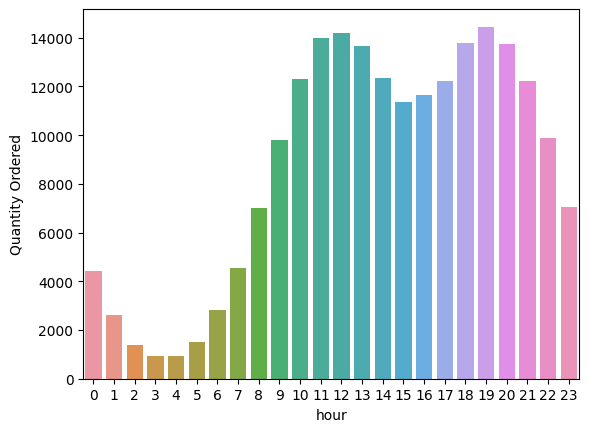

In [30]:
# sns.countplot(x = data['hour'],data = data)
bestime = data.groupby('hour').sum(numeric_only = True).reset_index()
sns.barplot(x = bestime['hour'],y = bestime['Quantity Ordered'], data = data)
bestime.sort_values(by = 'Quantity Ordered',ascending = False )

around 7 PM evening will be the goot time for advertesement

# Which product was sold the least as per your categories and what might be the reason behind that. Explain your analysis.

[Text(0, 0, 'USB-C Charging Cable'),
 Text(1, 0, 'Bose SoundSport Headphones'),
 Text(2, 0, 'Google Phone'),
 Text(3, 0, 'Wired Headphones'),
 Text(4, 0, 'Macbook Pro Laptop'),
 Text(5, 0, 'Lightning Charging Cable'),
 Text(6, 0, '27in 4K Gaming Monitor'),
 Text(7, 0, 'AA Batteries (4-pack)'),
 Text(8, 0, 'Apple Airpods Headphones'),
 Text(9, 0, 'AAA Batteries (4-pack)'),
 Text(10, 0, 'iPhone'),
 Text(11, 0, 'Flatscreen TV'),
 Text(12, 0, '27in FHD Monitor'),
 Text(13, 0, '20in Monitor'),
 Text(14, 0, 'LG Dryer'),
 Text(15, 0, 'ThinkPad Laptop'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'LG Washing Machine'),
 Text(18, 0, '34in Ultrawide Monitor')]

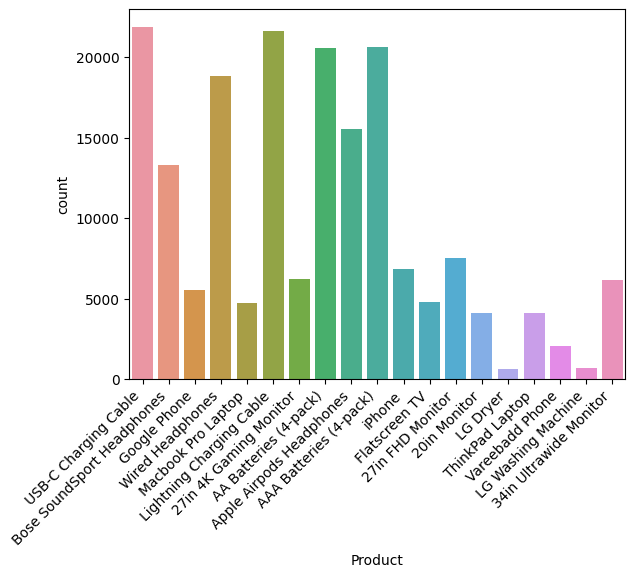

In [31]:
chart = sns.countplot(x = data['Product'], orient = 'h',  data = data)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

# Which product is most likely to be sold more during winter season, summer season and rainy season? Explain the possible reason behind the High-Volume Sale

In [32]:
# winter season - nov dec jan feb 
# summer season - march Arpl , may , june
# rainy season - july august sept oct


# Which phone is sold most during the month of March?

In [33]:
march_phone = march_db[march_db['Categories']=='Phone']
march_phone.groupby('Product').sum(numeric_only = True)
# march_phone

,Order ID,Quantity Ordered,Price Each,Year,Month,Date,Price
Product,,,,,,,
Google Phone,78298138,463,277800.0,934797,1389,7362,277800
Vareebadd Phone,29446884,174,69600.0,351306,522,2705,69600
iPhone,90697414,538,375900.0,1084203,1611,8715,375900


iphone sold the most in march month

# Which headphones are the most expensive?

In [34]:
# data[data['Product']]
headphones = data[data['Product'].str.contains('Headphones')]
# chart = sns.countplot(x = headphones['Product'], data = data)
# chart.set_xticklabels(chart.get_xticklabels(),rotation = 45)
headphones.groupby('Product')['Price Each'].mean()


# chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

Product
Apple Airpods Headphones      150.00
Bose SoundSport Headphones     99.99
Wired Headphones               11.99
Name: Price Each, dtype: float64

apple airpods are most expensive

# Check if the price of any product is changing in different months. If yes, explain the possible reason behind the price change


In [35]:
# int_df = pd.merge(d1, d2, how ='inner', on =['A', 'B'])
jan_db
feb_db
# jan_feb = pd.merge(jan_db, feb_db, how = 'inner', on = ['Product','Product'])
# jan_feb
# a = np.intersect1d(jan_db.Product, feb_db.Product)
# jan_feb = pd.merge(jan_db[['Product','Price']], feb_db[['Product','Price']], on='Product', how='inner')
jan_feb = pd.merge(jan_db[['Product','Price']], feb_db[['Product','Price']], on='Product', how='inner')
tmarch = pd.merge(jan_feb,  )
jan_feb.drop_duplicates()
# jan_feb
# jan_db = month_db[1]
# jan_db[['Product','Price']]
# jan_db

TypeError: merge() missing 1 required positional argument: 'right'

In [38]:
products = data['Product'].unique()
len(products)
# for i in 
# data[data['Product']==]
count = 0
for i in products.tolist():
    print(data[(data['Product']==i)]['Price'].unique())
    count = count+1
print(count)

[12]
[100]
[600]
[12]
[1700]
[15]
[390]
[4]
[150]
[3]
[700]
[300]
[150]
[110]
[600]
[1000]
[400]
[600]
[380]
19


conclusion: count and len(products) have same value , therefore for each product thre is a single value

# People prefer which product more in earphones, wired or wireless?

[Text(0, 0, 'Bose SoundSport Headphones'),
 Text(1, 0, 'Wired Headphones'),
 Text(2, 0, 'Apple Airpods Headphones')]

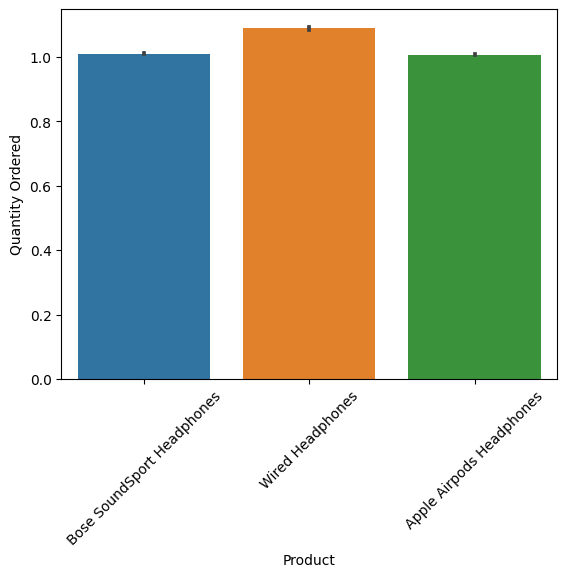

In [36]:
headphones = data[data['Product'].str.contains('Headphones')]
headphones.groupby('Product').sum('Quantity Ordered').reset_index()


chart = sns.barplot(x = headphones['Product'], y = headphones['Quantity Ordered'], data = data)
chart.set_xticklabels(chart.get_xticklabels(),rotation = 45)

In [40]:
wireless_headphones =  headphones[~headphones['Product'].str.contains('Wired Headphones')]
wired_headphones = headphones[headphones['Product'].str.contains('Wired Headphones')]
headphones['Quantity Ordered'].sum()
headphones['Product'].value_counts()
print(f"Quantity of wireless headphones is {headphones['Quantity Ordered'].sum()} and quantity of wired headphones is {wired_headphones['Quantity Ordered'].sum()}")

Quantity of wireless headphones is 49591 and quantity of wired headphones is 20524


conclusion wireless headpones have more sale 

In [41]:
CategoriesL =data["Categories"].unique().tolist()
for i in CategoriesL:
    print((data[data['Categories']==i]).sort_values(by = 'Quantity Ordered', ascending = False).iloc[0]['Product'])


USB-C Charging Cable
Wired Headphones
iPhone
Macbook Pro Laptop
20in Monitor
AAA Batteries (4-pack)
Flatscreen TV
LG Dryer
LG Washing Machine


In [ ]:
# data['Product'][0]